In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2025-05-20 00:23:30.885139: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 00:23:30.927646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-20 00:23:31.906581: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
letters = ord('z') - ord('a') + 1
blockSize = 32

In [3]:
def sanitize_string(s):
    # remove every non-alpha character
    sanitized = ''.join(c for c in s if c.isalpha())
    return sanitized.lower()

In [4]:
def toWindows(s, blockSize=blockSize):
    i = 0
    out = []
    while i < len(s)-blockSize:
        block = s[i:i+blockSize]
        i += 1
        out.append(block)
    return out


In [5]:
def str_to_neurons(s):
    # convert string to list of neurons
    neurons = []
    for c in s:
        letter = [0]*letters
        letter[ord(c)-ord('a')] = 1
        neurons+=letter
    return neurons

In [6]:
s = None
with open("smash.txt", "r") as f:
    s = toWindows(sanitize_string(f.read()), blockSize)

In [7]:
r = None
with open("random.txt", "r") as f:
    r = toWindows(sanitize_string(f.read()), blockSize)
r = r[:len(s)]

In [8]:
r = [(i, 0) for i in r]
s = [(i, 1) for i in s]
df = pd.DataFrame(r + s, columns=["text", "label"])

In [9]:
df

,text,label
0,avsjutvuacikszktixeydrvzvwtsincy,0
1,vsjutvuacikszktixeydrvzvwtsincyn,0
2,sjutvuacikszktixeydrvzvwtsincynx,0
3,jutvuacikszktixeydrvzvwtsincynxc,0
4,utvuacikszktixeydrvzvwtsincynxcc,0
...,...,...
1709,nwbevtcwnebvcrtnbvwetcrnwbvecrtn,1
1710,wbevtcwnebvcrtnbvwetcrnwbvecrtnw,1
1711,bevtcwnebvcrtnbvwetcrnwbvecrtnwe,1
1712,evtcwnebvcrtnbvwetcrnwbvecrtnweb,1


In [10]:
data = np.array(df["text"].apply(str_to_neurons).tolist())
labels = df["label"].values

In [11]:
data

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(blockSize*letters,)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
])

2025-05-20 00:23:32.795790: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [16]:
history = model.fit(
    data,
    labels,
    epochs=20,
    batch_size=32,
    validation_split=0.05,
)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 5.3718e-06 - val_accuracy: 0.8721 - val_loss: 0.4345
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 4.8512e-06 - val_accuracy: 0.8721 - val_loss: 0.4413
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 3.7862e-06 - val_accuracy: 0.8721 - val_loss: 0.4450
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 3.6259e-06 - val_accuracy: 0.8605 - val_loss: 0.4490
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 3.7239e-06 - val_accuracy: 0.8605 - val_loss: 0.4500
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 3.3832e-06 - val_accuracy: 0.8605 - val_loss: 0.4559
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 2.9467e-06 - val_accuracy: 0.8605 - val_loss: 0.4585
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 2.875

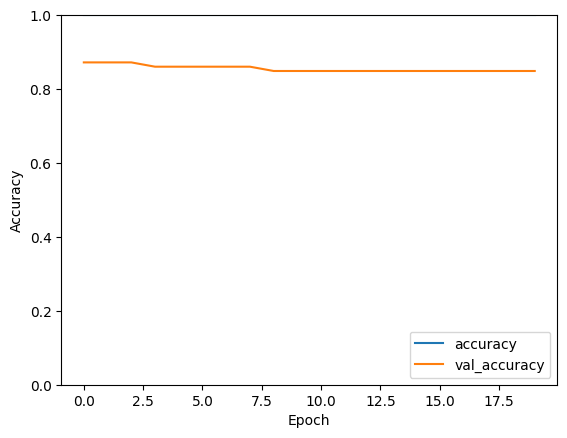

In [17]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [24]:
test_str = "oeirpowieoifofodjfijdsfjdskjcknxjcjxzcjnxcjzcjbhehdguewhudheidioejdwejdewl;kdlekdledewddeededed"[:blockSize]
test_arr = np.array([str_to_neurons(sanitize_string(test_str))])
test_arr

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [25]:
model.predict(test_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[ 0.      , 19.468298]], dtype=float32)